Welcome to JupyROOT 6.28/10
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001939_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001940_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001941_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001942_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001943_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001944_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001945_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001946_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001947_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001948_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001949_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-008-000.001950_000.root
Reading file: rec.mu2e.CRV_wideband_

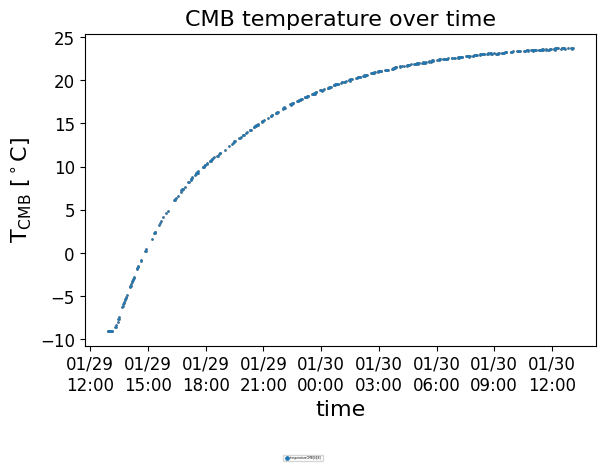

In [1]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
from ROOT import gROOT, gStyle, gDirectory, gPad

from array import array
import tarfile
import subprocess

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

topdir = os.path.dirname(os.path.abspath("__file__"))
settings_dir = os.path.join(topdir,"settings")

filelist = filepath.getfilelist(["SiDet2DynamicVbias"],"recoROOT",8)[0]
tarname = "raw.mu2e.CRV_wideband_cosmics.crvled-004.001939-002002_settings_history.tar.gz"
tarname = os.path.join(settings_dir,tarname)
logname_list = tarfile.open(tarname).getnames()

nSmooth = 1 
tdict = {'*':[["temperatureCMB[0][8]"]]}

SMALL_SIZE = 12
MEDIUM_SIZE = 16 
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('legend', fontsize=2)

tfig = utils.plot_dqm(filelist, tdict, '& 0xfffffffffffffe == 0x0', False, nSmooth, True, "CMB temperature over time;time;T$_{\mathrm{CMB}}$ [$^\circ\mathrm{C}$]")

SMALL_SIZE = 12
MEDIUM_SIZE = 14 
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
plot_dir = os.path.join(topdir,"paper_plots")
tfig[0].gca().set_title("")
legend = tfig[0].gca().get_legend()
if legend:
    legend.remove()
tfig[0].savefig(os.path.join(plot_dir,"Temp_dynamic_vbias.pdf"), bbox_inches='tight')

In [3]:
import portROOT2pd
topdir = os.path.dirname(os.path.abspath("__file__"))
analysis_dir = os.path.join(topdir,"analysis_root_files")
settings_dir = os.path.join(topdir,"settings")

filelist = filepath.getfilelist(["SiDet2DynamicVbias"],"recoROOT",8)[0]

df_runs = portROOT2pd.PortToDF(filelist, None)
display(df_runs)

,run,subrun,FEB,ch,pedestal,calibRaw,calibAdj,FEBtemp,CMBtemp,biasV,PEs,PEsCorrected
0,1939,0,0,0,-10.94760,377.229004,363.446014,46.871,17.10000,53.829998,0.7,0.7
1,1939,0,0,1,17.35470,389.625000,376.252014,46.871,17.10000,53.829998,0.7,0.7
2,1939,0,0,2,1.65125,395.667999,382.148987,46.871,17.10000,53.829998,0.7,0.7
3,1939,0,0,3,-1.40130,386.341003,372.682007,46.871,17.10000,53.829998,0.7,0.7
4,1939,0,0,4,-11.65720,559.010986,360.890991,46.871,-9.08125,53.829998,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2002,0,0,59,-7.34066,386.589996,416.298004,43.94143,23.66250,54.377140,0.7,0.7
4092,2002,0,0,60,-8.45724,382.457001,410.638000,43.94143,23.47500,54.377140,0.7,0.7
4093,2002,0,0,61,-4.62884,404.052002,431.769989,43.94143,23.47500,54.377140,0.7,0.7
4094,2002,0,0,62,2.09807,388.914001,417.877991,43.94143,23.47500,54.377140,0.7,0.7


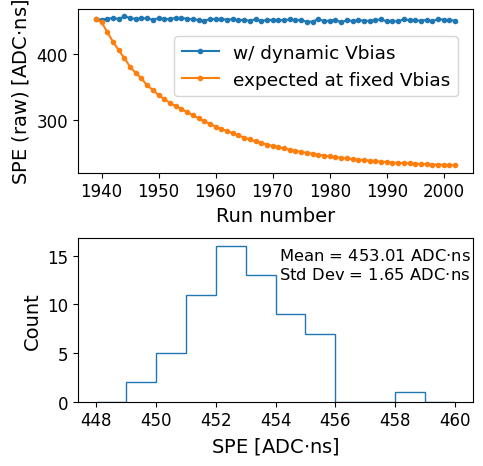

In [4]:
for iAFE in range(4, 5):
    fig = plt.figure(figsize = (5.1,5.1))
    # fig.subplots_adjust(top=0.9)
    # plt.suptitle('FEB 0 AFE %i'%(iAFE))
    axs = fig.subplots(2, 1, #sharex='col',
                       gridspec_kw={'height_ratios':[4,4],
                                    'wspace':0, 'hspace':0.4})
    ytitles = ['SPE (raw) [ADC$\cdot$ns]', 'counts']
    for ii in range(2):
        axs[ii].set_ylabel(ytitles[ii])
    axs[0].set_xlabel('Run number')

    df_run_ = df_runs.query("ch==%i"%(8*iAFE)).reset_index()

    axs[0].plot(df_run_['run'], df_run_['calibRaw'],'.-', label='w/ dynamic Vbias')
    temp_shifted = np.add((df_run_['CMBtemp']-df_run_['CMBtemp'][0])*(-55.4), (df_run_['FEBtemp']-df_run_['FEBtemp'][0])*(4.09)) * 0.1255
    temp_shifted = np.add(temp_shifted, (df_run_['FEBtemp']-df_run_['FEBtemp'][0])*(-1.46)) + df_run_['calibRaw'][0]
    axs[0].plot(df_run_['run'], temp_shifted,'.-', label='expected at fixed Vbias')
    axs[0].legend(fontsize='small', loc='upper left', bbox_to_anchor=(0.22, 0.89))
    
    #axs[1].plot(df_run_['run'], df_run_['PEs'],'.-', label='w/ dynamic Vbias')
    #axs[1].legend(fontsize='small')
    
    axs[1].hist(df_run_['calibRaw'], bins=[448+i for i in range(13)], histtype='step')
    #axs[1].set_title("Distribution of SPE, "+r'$\mu$'+"=%.2f"%(np.mean(df_run_['calibRaw']))+r', $\sigma$'+"=%.2f"%(np.std(df_run_['calibRaw'])))
    axs[1].text(0.51, 0.75, 'Mean = %.2f ADC$\cdot$ns'%(np.mean(df_run_['calibRaw']))+'\n'+'Std Dev = %.2f ADC$\cdot$ns'%(np.std(df_run_['calibRaw'])), fontsize = 11.8, transform=axs[1].transAxes)
    axs[1].set_xlabel('SPE [ADC$\cdot$ns]')
    axs[1].set_ylabel('Count')

    plt.show()

fig.savefig(os.path.join(plot_dir,"SPE_dynamic_vbias.pdf"), bbox_inches='tight')

In [5]:
import pickle
from scipy import stats
from scipy.optimize import curve_fit

pklname = os.path.join(analysis_dir,"gainAFEScanDF.pkl")
with open(pklname, 'rb') as f:
    df = pickle.load(f)
df = df.query("gainAFE != 0x800 & gainAFE != 0xc00 & gainAFE != 0x600").reset_index() 

In [6]:
import matplotlib.gridspec as gridspec

markers = ['v', 'o', 's', '^', 'P', 'X', 'd', '*', '8', '<', '>']

FEBs = df['FEB'].unique()
FEBs = np.sort(FEBs)
gainAFEs = df['gainAFE'].unique()
gainAFEs = np.sort(gainAFEs)
vAFEs = [float(val)/4096.*1.54 for val in gainAFEs]

bad_channels = []

def ratio2dB(val, ref):
    return 20.*np.log10(val/ref)

def func(x, a, b):
    return a*np.exp(b*x)

def plotter(yitem, title = '', plot=False):
    global gainAFEs
    
    ch_array = []
    dBperV = []
    ratio_array = [[] for val in gainAFEs]

    if plot:
        fig1, ax1 = plt.subplots(2, 1, sharex='col', sharey='row', figsize=(5, 7.5),
                                 gridspec_kw={'width_ratios':[1],'height_ratios':[5,2.5],
                                              'wspace':0, 'hspace':0})  
        fig2, ax2 = plt.subplots(figsize=(5, 5))
        ax1[0].set_ylabel('SPE [ADC$\cdot$ns]')
        ax1[1].set_ylabel('Data/Fit')
        ax1[1].set_xlabel('V$_{\mathrm{AFE}}$ [V]')
        ax2.set_ylabel('Relative Gain G$_{\mathrm{AFE}}$ [dB]')
        ax2.set_xlabel('V$_{\mathrm{AFE}}$ [V]')

    for FEB in FEBs:
        for chan in range(64):
            df_ = df.query("FEB==%i & ch==%i"%(FEB, chan)).reset_index()
            
            x = df_['gainAFE'].astype(float)
            x = x/4096.*1.54
            
            y = df_[yitem]
            yerr = df_[yitem+'Err']
            
            mask = (y>0)
    
            x=x[mask]
            y=y[mask]
            yerr = yerr[mask]

            if y.size==0:
                print("Bad channel: %d"%(chan))
                continue
            if (FEB, chan) in bad_channels:
                continue

            popt, pcov = curve_fit(func, x, y, sigma = yerr)
            
            ch_array.append(64*FEB+chan)
            dBperV.append(popt[1]*20.*np.log10(np.e))

            y_ratio = np.divide(y, func(x, popt[0], popt[1]))
            for ii, tyratio in enumerate(y_ratio):
                ratio_array[ii].append(tyratio)
            yerr_ratio = np.divide(yerr, func(x, popt[0], popt[1]))

            if plot and FEB==0 and chan<4:
                tscaterr = ax1[0].errorbar(x, y, yerr, marker=markers[chan], linestyle='none', label='A = %.1f ADC$\cdot$ns, k = %.3f V$^{-1}$'%(popt[0], popt[1]))
                tcolor = tscaterr[0].get_color()
                xx = np.linspace(np.min(x), np.max(x), 100)
                yy = func(xx, popt[0], popt[1])
                ax1[0].plot(xx, yy, '--', color=tcolor, linewidth=0.7)

                ax1[1].errorbar(x, y_ratio, yerr_ratio, marker=markers[chan], linestyle='none', color=tcolor)
                ax1[1].axhline(y=1., color='k', linestyle='--')
                
                y_dB = ratio2dB(y, popt[0])
                ax2.plot(x, y_dB, marker=markers[chan], linestyle='none', color=tcolor)
                ax2.plot(xx, xx*popt[1]*20.*np.log10(np.e), '--', color=tcolor, linewidth=0.7, label='Slope = %.1f $\pm$ %.1f dB/V'%(popt[1]*20.*np.log10(np.e), np.sqrt(pcov[1,1])*20.*np.log10(np.e)))

    if plot:
        # ax1[0].legend(title='SPE = A$\cdot$exp(k$\cdot$x)')
        ax1[0].legend()
        ax1[0].set_ylim(250,2000)
        ax1[1].set_ylim(0.88,1.12)
        ax2.set_ylim(-14,0.5)
        ax2.legend()

        fig1.savefig(os.path.join(plot_dir,"afegain_ch_1.pdf"), bbox_inches='tight')
        fig2.savefig(os.path.join(plot_dir,"afegain_ch_2.pdf"), bbox_inches='tight')
                        
    return ch_array, dBperV, x, ratio_array

In [7]:
def displayItem(item, title, plot=False):
    global gainAFEs
    ch_array, dBperV, x, ratio_array = plotter(item, title, plot)

    if plot:
        fig, ax = plt.subplots(figsize=(5, 4))
        rangemin = np.floor(np.min(dBperV))
        rangemax = np.ceil(np.max(dBperV))
        step = 0.2
        nbins = int((rangemax-rangemin)/step)
        ax.hist(dBperV, [float(rangemin)+step*float(i) for i in range(nbins+1)], histtype='step')
        ax.text(0.05, 0.85, 'Mean = %.2f dB/V'%(np.mean(dBperV))+'\n'+'Std Dev = %.2f dB/V'%(np.std(dBperV)), fontsize = 12, transform=ax.transAxes)
        ax.set_xlabel("$d$G$_{\mathrm{AFE}}$ / $d$V$_{\mathrm{AFE}}$ [dB/V]")
        ax.set_ylabel("Count") 

        # fig.savefig(os.path.join(plot_dir,"afegain_dist.pdf"), bbox_inches='tight')
    
    return dBperV, x, ratio_array

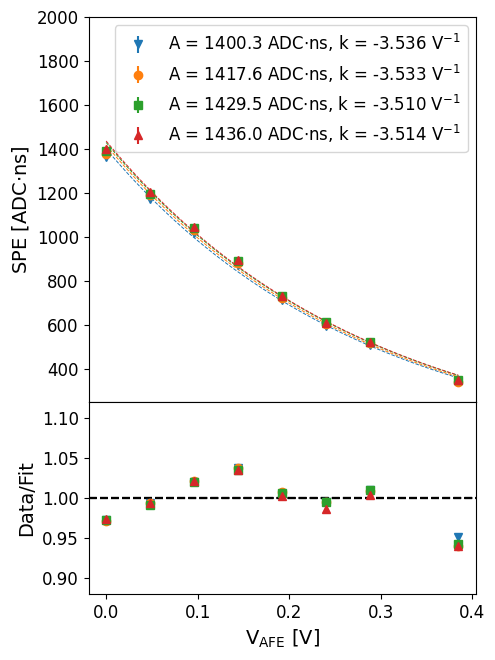

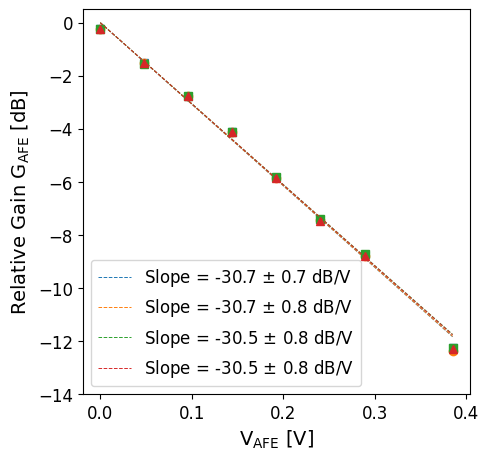

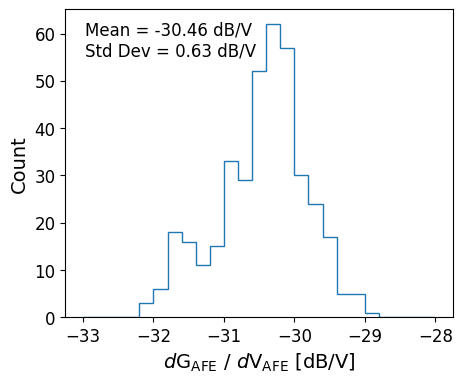

In [8]:
dBperV1, x1, ratio_array1 = displayItem('calibRaw', 'SPE raw')
dBperV4, x4, ratio_array4 = displayItem('calibAdj3', '', True)

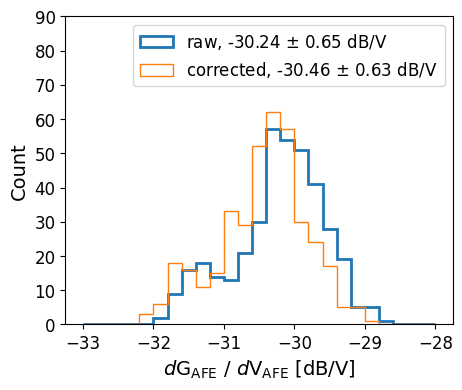

In [9]:
fig, ax = plt.subplots(figsize=(5, 4))
rangemin = np.floor(np.min(dBperV4))
rangemax = np.ceil(np.max(dBperV4))
step = 0.2
nbins = int((rangemax-rangemin)/step)
ax.hist(dBperV1, [float(rangemin)+step*float(i) for i in range(nbins+1)], histtype='step', linewidth=2, label = "raw, %.2f $\pm$ %.2f dB/V"%(np.mean(dBperV1), np.std(dBperV1)))
ax.hist(dBperV4, [float(rangemin)+step*float(i) for i in range(nbins+1)], histtype='step', linewidth=1, label = "corrected, %.2f $\pm$ %.2f dB/V"%(np.mean(dBperV4), np.std(dBperV4)))
# plt.title("Distribution of AFE Gain")
ax.set_xlabel("$d$G$_{\mathrm{AFE}}$ / $d$V$_{\mathrm{AFE}}$ [dB/V]")
ax.set_ylabel("Count") 
ax.set_ylim(0,90)
ax.legend()

fig.savefig(os.path.join(plot_dir,"afegain_dist.pdf"), bbox_inches='tight')

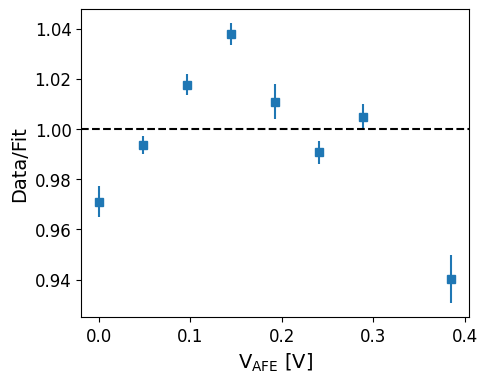

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))
#plt.errorbar(x1, np.mean(np.array(ratio_array1), axis=1), np.std(np.array(ratio_array1), axis=1), marker='o', linestyle='none', label='avg. baseline = (%.2f $\pm$ %.2f) dB/V * $V_{AFE}$, %s'%(np.mean(dBperV1), np.std(dBperV1), 'raw'))
ax.errorbar(x4, np.mean(np.array(ratio_array4), axis=1), np.std(np.array(ratio_array4), axis=1), marker='s', linestyle='none')
ax.axhline(y=1., color='k', linestyle='--')
# plt.title("Deviation from linear dB/V")
ax.set_xlabel("V$_{\mathrm{AFE}}$ [V]")
ax.set_ylabel("Data/Fit")
#ax.legend(loc='upper left', bbox_to_anchor=(0.0, 0.25))
#ax.text(0.05, 0.15, 'Avg. fit slope: %.2f $\pm$ %.2f dB/V'%(np.mean(dBperV4), np.std(dBperV4)), fontsize = 12, transform=ax.transAxes)

fig.savefig(os.path.join(plot_dir,"afegain_residue.pdf"), bbox_inches='tight')

In [11]:
import pandas as pd

pklname = os.path.join(analysis_dir,"gainCalibrationSiDetRun2.pkl")

with open(pklname, 'rb') as f:
    df = pickle.load(f)

# remove runs with Vover < 2.5V 
df = df.query("VoverN > 2.0").reset_index() 

Bad channel: 7 at AFE 0x364
Bad channel: 7 at AFE 0x374
Bad channel: 7 at AFE 0x394
Bad channel: 7 at AFE 0x3A4
Too few Vbias: 7 at AFE 0x3B4
Bad channel: 18 at AFE 0x354
Bad channel: 18 at AFE 0x364
Too few Vbias: 18 at AFE 0x374
Bad channel: 18 at AFE 0x384
Bad channel: 18 at AFE 0x394
Bad channel: 18 at AFE 0x3A4
Too few Vbias: 18 at AFE 0x3B4
Too few Vbias: 19 at AFE 0x394
Too few Vbias: 37 at AFE 0x364
Too few Vbias: 37 at AFE 0x374


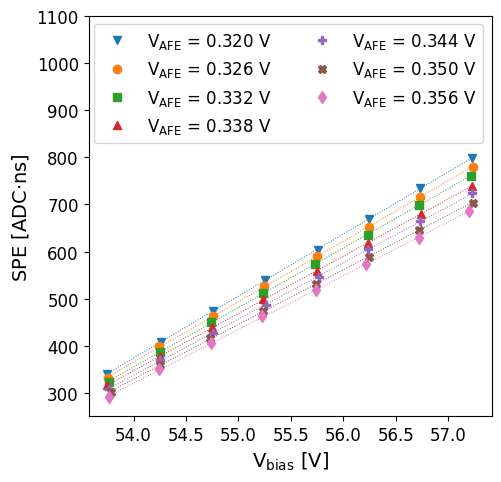

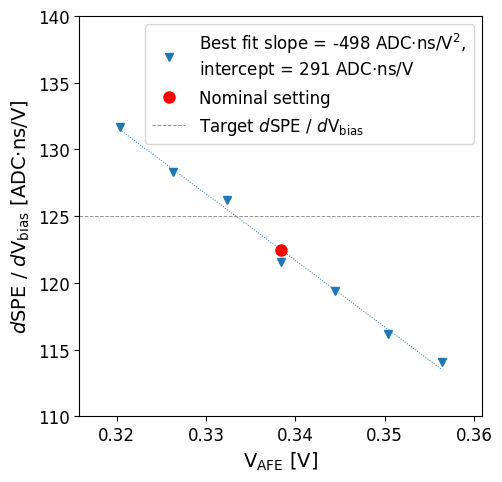

In [12]:
FEBs = df['FEB'].unique()
FEBs = np.sort(FEBs)
gainAFEs = df['gainAFE'].unique()
gainAFEs = np.sort(gainAFEs)
vAFEs = [float(val)/4096.*1.54 for val in gainAFEs]

bad_channels = [ 7, 18, 19, 37]

def to_hex(x, pos):
    return '0x%X' % int(x)

def func(x, a, b):
    return a*np.exp(b*x/4096.*1.54) # avoiding fitting overflow. convert to voltage

def plotter(FEBs, gainAFEs, title = ''):
    global badChannels

    df_calib = pd.DataFrame()
    
    SPE_PER_V_AT_25C_GOAL = 125

    fig1, ax1 = plt.subplots(figsize=(5.2, 5.2))
    fig2, ax2 = plt.subplots(figsize=(5.2, 5.2))
    ax1.set_xlabel('V$_{\mathrm{bias}}$ [V]')
    ax1.set_ylabel('SPE [ADC$\cdot$ns]')
    ax2.set_xlabel('V$_{\mathrm{AFE}}$ [V]')
    ax2.set_ylabel('$d$SPE / $d$V$_{\mathrm{bias}}$ [ADC$\cdot$ns/V]')
    
    for FEB in FEBs:
        for chan in range(64):

            gainAFEs = df['gainAFE'].unique()
            gainAFEs = np.sort(gainAFEs)
            SPEperV_list = []

            emptyFlag = True
            slopeAt0x384 = 0
            for iii, tgainAFE in enumerate(gainAFEs):
                df_ = df.query("FEB==%i & ch==%i & gainAFE==%i"%(FEB, chan, tgainAFE)).reset_index()
                xx = df_['biasV'].astype(float)
                yy = df_['calibRaw'].astype(float)
                mask = (yy>0)
                xx=xx[mask]
                yy=yy[mask]
                if yy.size==0:
                    print("Bad channel: %d at AFE 0x%03X"%(chan, tgainAFE))
                    SPEperV_list.append(0)
                    continue
                #if chan in badChannels:
                    #SPEperV_list.append(0)
                    #continue

                if len(xx)>3 and np.max(xx)-np.min(xx)>3:
                    emptyFlag = False
                    slope, intercept, r_value, p_value, std_err = stats.linregress(xx.astype(float), yy.astype(float))
                    SPEperV_list.append(slope)
                    if tgainAFE == 0x384:
                        slopeAt0x384 = slope
                    
                    if FEB == 0 and chan == 0:
                        # tscatter = ax1.plot(xx, yy, markers[iii], label='V$_{\mathrm{AFE}}$ = %.2f V, slope = %.1f ADC$\cdot$ns/V'%(vAFEs[iii], slope))
                        tscatter = ax1.plot(xx, yy, markers[iii], label='V$_{\mathrm{AFE}}$ = %.3f V'%(vAFEs[iii]))
                        ax1.plot(xx, slope * xx + intercept, ':', color = tscatter[0].get_color(), linewidth=0.7)
                
                else:
                    print("Too few Vbias: %d at AFE 0x%03X"%(chan, tgainAFE))
                    SPEperV_list.append(0)
            
            SPEperV_list = np.array(SPEperV_list)
            gainAFEs = np.array(gainAFEs)
            mask = (SPEperV_list>0)
            gainAFEs = gainAFEs[mask]
            SPEperV_list = SPEperV_list[mask]

            if len(gainAFEs)>2:
                slope, intercept, r_value, p_value, std_err = stats.linregress(gainAFEs/4096.*1.54, SPEperV_list)
                lin_gain_float = (SPE_PER_V_AT_25C_GOAL - intercept)/slope*4096./1.54

                if FEB == 0 and chan == 0:
                   
                    tscatter = ax2.plot(gainAFEs/4096.*1.54, SPEperV_list, 'v', label='Best fit slope = %.0f ADC$\cdot$ns/V$^2$, \nintercept = %.0f ADC$\cdot$ns/V'%(slope, intercept))
                    ax2.plot(vAFEs, slope * np.array(vAFEs) + intercept, ':', color = tscatter[0].get_color(), linewidth=0.7)      
                    
                    ax2.plot(0x384/4096.*1.54, float(slope*0x384/4096.*1.54+intercept), marker="o", markersize=8, ls = '', color='r', label = 'Nominal setting')
                    ax2.axhline(y = SPE_PER_V_AT_25C_GOAL, color = '#929591', linestyle = '--', linewidth=0.7, label = 'Target $d$SPE / $d$V$_{\mathrm{bias}}$') 
                    
                    ax2.legend()
                    ax2.set_xlim(840/4096.*1.54,960/4096.*1.54)
                    ax2.set_ylim(110,140)

                # also try exp function
                popt, pcov = curve_fit(func, gainAFEs, SPEperV_list)
                exp_A = popt[0]
                exp_b = popt[1]
                exp_gain_float = np.log(SPE_PER_V_AT_25C_GOAL/exp_A)/exp_b*4096./1.54

            else:
                slope = 0.
                intercept = 0.
                lin_gain_float = 0.
                # lin_gain_calib = 0
                # lin_SPEperV_shift = 0.
                exp_A = 0.
                exp_b = 0.
                exp_gain_float = 0.

            df_calib_ = pd.DataFrame()
            df_calib_['FEB'] = [FEB]
            df_calib_['ch'] = [chan]
            df_calib_['SPEperV_0x384'] = [slopeAt0x384]
            
            df_calib_['lin_slope'] = [slope/4096.*1.54]
            df_calib_['lin_intercept'] = [intercept]
            df_calib_['lin_gain_float'] = [lin_gain_float]
            # df_calib_['lin_gain_calib'] = [lin_gain_calib]
            # df_calib_['lin_SPEperV_shift'] = [lin_SPEperV_shift]

            df_calib_['exp_A'] = [exp_A]
            df_calib_['exp_b'] = [exp_b]
            df_calib_['exp_gain_float'] = [exp_gain_float]
            
            df_calib = pd.concat([df_calib,df_calib_], ignore_index=True)

    ax1.legend(ncol=2)
    ax1.set_ylim(250,1100)

    fig1.savefig(os.path.join(plot_dir,"afegain_calib_ch_1.pdf"), bbox_inches='tight')
    fig2.savefig(os.path.join(plot_dir,"afegain_calib_ch_2.pdf"), bbox_inches='tight')
    
    return df_calib 

df_calib = plotter(FEBs, gainAFEs, 'Gain Calibration')

In [13]:
bad_channels = [ 7, 10, 18, 19]
df_calib_clean = df_calib[~df_calib['ch'].isin(bad_channels)]

register_list = ['46', '47', '446', '447', '846', '847', 'c46', 'c47']
gain_list = []
full_gain_list = []
for iAFE in range(8):
    ch_lo = iAFE*8-0.5
    ch_hi = iAFE*8+7.5
    df_calib_clean_ = df_calib_clean.query("ch>%f & ch<%f"%(ch_lo, ch_hi)).reset_index()
    mean_gain = int(round(np.mean(df_calib_clean_['lin_gain_float'])))
    gain_list.append(mean_gain)
    #print(iAFE)
    #print(list(df_calib_clean_['lin_gain_float']))
    #print(mean_gain, "%03x"%mean_gain)
    full_gain_list+=([mean_gain for i in range(len(df_calib_clean_['lin_gain_float']))])
#print("")
#for iAFE in range(8):
    #print("wr "+register_list[iAFE]+" %03x"%gain_list[iAFE])
#print("")
#print(full_gain_list)
full_gain_list = np.array(full_gain_list)

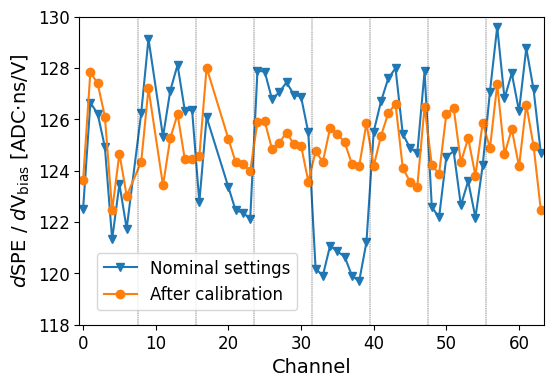

In [14]:
# expected SPE/V
fig = plt.figure(figsize = (6,4))
plt.plot(df_calib_clean['ch'], np.add(df_calib_clean['lin_slope']*0x384, df_calib_clean['lin_intercept']), markers[0]+'-',label=('Nominal settings'))
plt.plot(df_calib_clean['ch'], np.add(np.multiply(df_calib_clean['lin_slope'], np.array(full_gain_list)), df_calib_clean['lin_intercept']), markers[1]+'-', label=('After calibration'))
#plt.title("SPE/V after calibration")
plt.xlabel("Channel")
plt.ylabel("$d$SPE / $d$V$_{\mathrm{bias}}$ [ADC$\cdot$ns/V]")
plt.legend(loc='lower left', bbox_to_anchor=(.02, .02))
for iAFE in range(8):
    plt.axvline(x=8*iAFE-0.5, color='k', linestyle='-'if iAFE==0 else '--', linewidth=0.3)
plt.gca().set_xlim(-0.5, 63+0.5)
plt.gca().set_ylim(118, 130)
plt.show()
fig.savefig(os.path.join(plot_dir,"afegain_calib_comparison.pdf"), bbox_inches='tight')

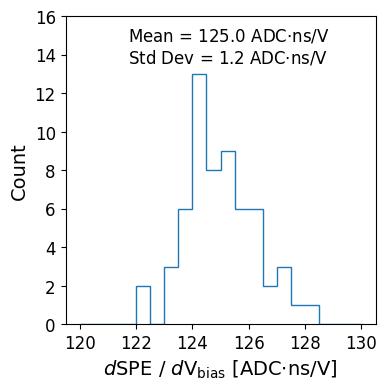

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))
rangemin = 120
rangemax = 130
step = 0.5
nbins = int((rangemax-rangemin)/step)
vals = np.add(np.multiply(df_calib_clean['lin_slope'], np.array(full_gain_list)), df_calib_clean['lin_intercept'])
ax.hist(vals, [float(rangemin)+step*float(i) for i in range(nbins+1)], histtype='step')
ax.set_xlabel("$d$SPE / $d$V$_{\mathrm{bias}}$ [ADC$\cdot$ns/V]")
ax.set_ylabel("Count")
ax.text(0.2, 0.85, 'Mean = %.1f ADC$\cdot$ns/V'%(np.mean(vals))+'\n'+'Std Dev = %.1f ADC$\cdot$ns/V'%(np.std(vals)), fontsize = 12, transform=ax.transAxes)
ax.set_ylim(0,16)

fig.savefig(os.path.join(plot_dir,"afegain_calib_hist.pdf"), bbox_inches='tight')